#NEURAL NETWORK CLASSIFICATION USING DEEP LEARNING

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [ ]:
from sklearn.datasets import make_circles

#MAKE 1000 SAMPLES
n_samples=1000

#CREATING CIRCLES
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
#CHECKING OUT THE FEATURES-FIRST 5
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
#CHECKING OUT THE LABELS-FIRST 10
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#MAKING DATAFRAME FOR FEATURES AND LABELS
circles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'labels':y})
circles.head()

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
#CHECKING OUT THE DIFFERENT LABELS
circles['labels'].value_counts()

1    500
0    500
Name: labels, dtype: int64

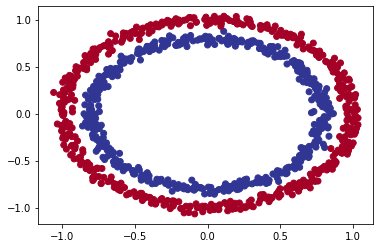

In [ ]:
#VISUALIZE A PLOT
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

**INPUT AND OUTPUT SHAPES**

In [ ]:
#CHECKING SHAPES OF FEATURES AND MODEL
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#CHECKING HOW MANY SAMPLES WE HAVE
len(X),len(y)

(1000, 1000)

In [ ]:
#VIEW THE FIRST EXAMPLE OF FEATURES
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

###STEPS IN MODELLING


**MODEL 1**

In [ ]:
#SET RANDOM SEED
tf.random.set_seed(42)
#CREATE A MODEL USING THE SEQUENTIAL API
model1=tf.keras.Sequential([tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
model1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
#TRAIN OUR MODEL FOR LONGER
model1.fit(X,y,epochs=200,verbose=0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

**MODEL 2**

In [ ]:
#SET RANDOM SEED
tf.random.set_seed(42)
#CREATE A MODEL USING THE SEQUENTIAL API
model2=tf.keras.Sequential([tf.keras.layers.Dense(1),
                            tf.keras.layers.Dense(1)])#second layer
#COMPILE THE MODEL
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
model2.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.5010


In [ ]:
#EVALUATE THE MODEL2
model2.fit(X,y,epochs=200,verbose=0)
model2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935995817184448, 0.5]

No improvement in model 2

So for improvement, we go for another model

**MODEL 3**

In [ ]:
#SET RANDOM SEED
tf.random.set_seed(42)
#CREATE A MODEL USING THE SEQUENTIAL API
model3=tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape=(None,1)),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#FIT THE MODEL
model3.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.4553 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.4902
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.4953
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.4952
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.4778


In [ ]:
#EVALUATE THE MODEL3
model3.fit(X,y,epochs=200,verbose=0)
model3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.5000


[0.1759263128042221, 0.5]

TAKING MODEL 3 AND DOING FURTHER PROCESS

In [ ]:
def plot_decision_boundary(model,X,y):
  #Define the axis boundaries of a plot and create a meshgrid
  x_min,x_max=X[:,0].min()-.1,X[:,0].max()+.1
  y_min,y_max=X[:,1].min()-.1,X[:,1].max()+.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  #Create X values
  x_in=np.c_[xx.ravel(),yy.ravel()]

  #Make predictions using the trained model
  y_pred=model.predict(x_in)

  #Check for multiclass 
  if len(y_pred[0])>1:
    print('Doing Multiclass Classification..')
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Doing Binary Classification..')
    y_pred=np.round(y_pred).reshape(xx.shape)

  #Plot decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

Doing Multiclass Classification..


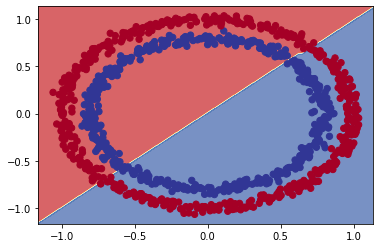

In [ ]:
#CHECKING DECISION BOUNDARIES
plot_decision_boundary(model3,X,y)

In [ ]:
#set random seeds
tf.random.set_seed(42)
#create some regression data
x_reg=np.arange(0,1000,5)
y_reg=np.arange(0,1000,5)
#split into train and test dataset
x_reg_train=x_reg[:150]
y_reg_train=y_reg[:150]
x_reg_test=x_reg[150:]
y_reg_test=y_reg[150:]
#FIT OUR MODEL TO DATA
model3.fit(tf.expand_dims(x_reg_train,axis=1),
           y_reg_train,epochs=100,verbose=0)

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         200       
                                                                 
 dense_4 (Dense)             (None, None, 10)          1010      
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


###RECREATING USING NEURAL NETWORK

In [ ]:
#SET UP RANDOM MODEL
tf.random.set_seed(42)
#RECREATE THE MODEL
model3=tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)])
#CHANGE THE LOSS AND METRICS OF OUR COMPILED MODEL
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
#FIT THE COMPILED MODEL
model3.fit(tf.expand_dims(x_reg_train,axis=-1),
           y_reg_train,epochs=100,verbose=0)

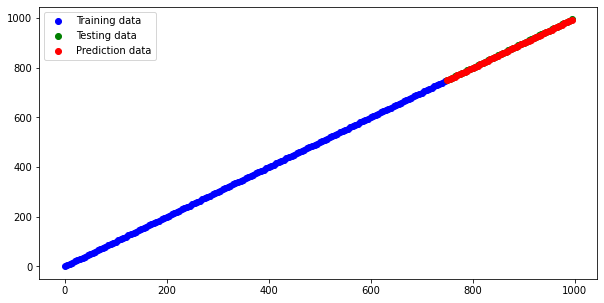

In [ ]:
#MAKE PREDICTIONS WITH TRAINED MODEL
y_reg_pred=model3.predict(y_reg_test)
#PLOT THE MODEL PREDICTION AGAINST OUR REGRESSION MODEL
plt.figure(figsize=(10,5))
plt.scatter(x_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(x_reg_test,y_reg_test,c='g',label='Testing data')
plt.scatter(x_reg_test,y_reg_pred.squeeze(),c='r',label='Prediction data')
plt.legend()
plt.show()

As the graph is **LINEAR** we are going for **Linear Activation Function** in MODEL 4

**MODEL 4**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model4=tf.keras.Sequential([tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history4=model4.fit(X,y,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


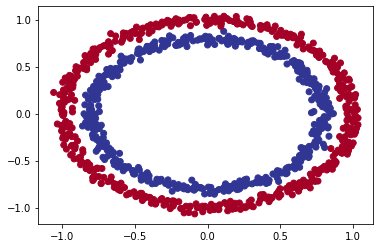

In [ ]:
#CHECK OUT OUR DATA
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

Doing Binary Classification..


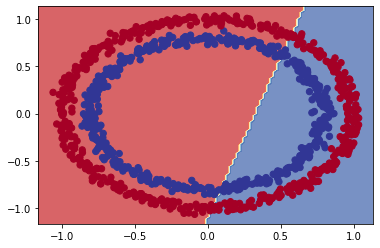

In [ ]:
#CHECKING DECISION BOUNDARIES
plot_decision_boundary(model4,X,y)

**MODEL 5** -Activation function is RELU(Rectified Linear Unit)

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model5=tf.keras.Sequential([tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history5=model5.fit(X,y,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Doing Binary Classification..


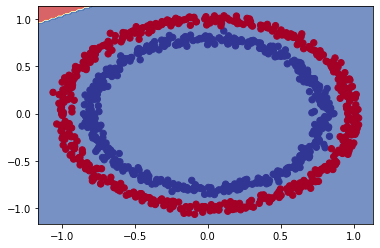

In [ ]:
#CHECKING DECISION BOUNDARIES
plot_decision_boundary(model5,X,y)

**MODEL 6**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model6=tf.keras.Sequential([tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history6=model6.fit(X,y,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Doing Binary Classification..


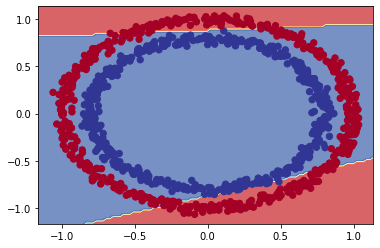

In [ ]:
#CHECKING PREDICTIONS USING 2 HIDDEN LAYERS
#CHECKING DECISION BOUNDARIES
plot_decision_boundary(model6,X,y)

**MODEL 7**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model7=tf.keras.Sequential([tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)])
#COMPILE THE MODEL
model7.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history7=model7.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

As the accuracy for the model 7 is 98.9%

In [ ]:
#EVALUATING THE MODEL 7
model7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing Binary Classification..


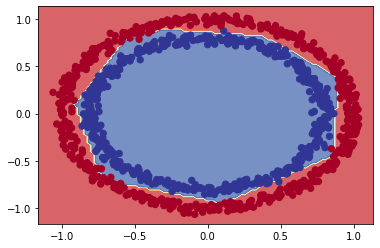

In [ ]:
#CHECKING PREDICTIONS USING 3 HIDDEN LAYERS
#CHECKING DECISION BOUNDARIES
plot_decision_boundary(model7,X,y)

In [ ]:
#CREATE A TOY TENSOR
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

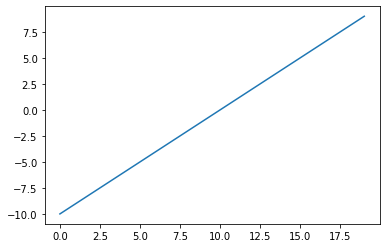

In [ ]:
plt.plot(A)

In [ ]:
def sig(x):
  return 1/(1+tf.exp(-x))
def relu(x):
  return tf.maximum(0,x)

In [ ]:
sig(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

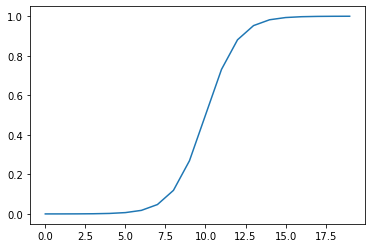

In [ ]:
plt.plot(sig(A))

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

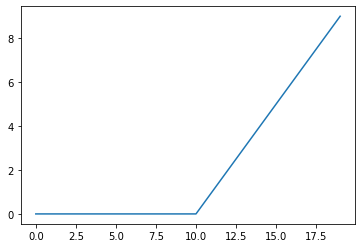

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

###EVALUATING AND IMPROVING OUR CLASSIFICATION MODEL

In [ ]:
len(X)

1000

In [ ]:
#splitting into training and testing dataset
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

**MODEL 8**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model8=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])
#COMPILE THE MODEL
model8.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history8=model8.fit(X_train,y_train,epochs=25,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#EVALUATE THE MODEL 8
loss,accuracy=model8.evaluate(X_test,y_test)
print(f'Model loss on test data:{loss}')
print(f'Model accuracy on test data:{100*accuracy:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on test data:0.12468849867582321
Model accuracy on test data:100.00%


Accuracy here is 100%

Doing Binary Classification..
Doing Binary Classification..


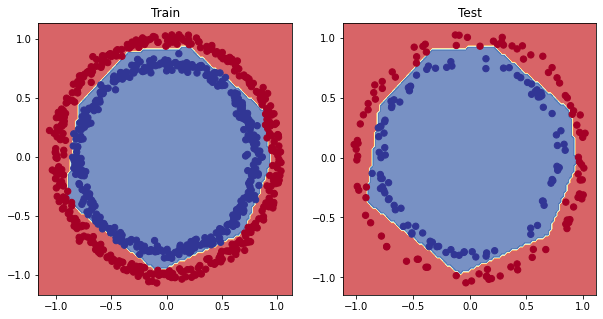

In [ ]:
#PLOT THE DECISION BOUNDARIES FOR TRAINING AND TESTING
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model8,X_test,y_test)
plt.show()

In [ ]:
#THE LOSS AND ACCURACY FOR FITTED MODEL
pd.DataFrame(history8.history).head()

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500


Text(0.5, 1.0, 'Model 8 Training curve')

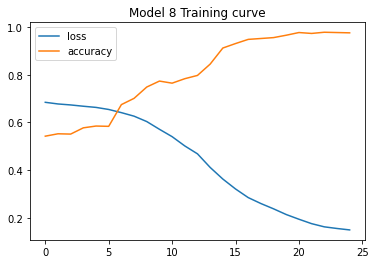

In [ ]:
#PLOT LOSS CURVE
pd.DataFrame(history8.history).plot()
plt.title('Model 8 Training curve')

**Epoch increases,Accuracy increases and LOSS decreases**

**MODEL 9**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model9=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])
#COMPILE THE MODEL
model9.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])
#CREATE A LEARNING RATE SCHEDULER CALLBACK
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
#FIT THE COMPILED MODEL
history9=model9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

In [ ]:
pd.DataFrame(history9.history).head()

,loss,accuracy,lr
0,0.694489,0.49875,0.000100
1,0.693771,0.49750,0.000112
2,0.693004,0.49625,0.000126
3,0.692244,0.49750,0.000141
4,0.691439,0.50625,0.000158


Text(0.5, 1.0, 'Model 9 Training curve')

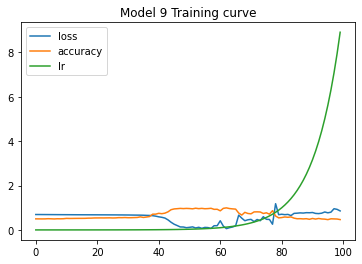

In [ ]:
#PLOT LOSS CURVE
pd.DataFrame(history9.history).plot()
plt.title('Model 9 Training curve')

EPOCH INCREASE-->LR INCREASE,LOSS and ACCURACY DECREASES

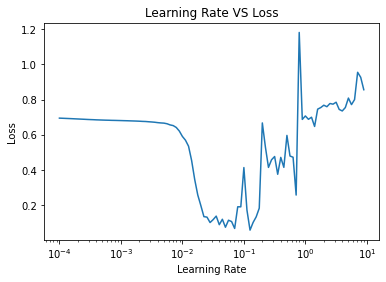

In [ ]:
#PLOT LR VS LOSS
lrs=1e-4* (10** (np.arange(100)/20))
plt.semilogx(lrs,history9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate VS Loss')
plt.show()

THUMB RULE to find IDEAL LEARNING RATE:

-->Take LR,where LOSS is **still decreasing** but not quite flattened.

**MODEL 10**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model10=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])
#COMPILE THE MODEL
model10.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history10=model10.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [ ]:
#EVALUATE THE MODEL 10
loss,accuracy=model10.evaluate(X_test,y_test)
print(f'Model loss on test data:{loss}')
print(f'Model accuracy on test data:{100*accuracy:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test data:0.05740184709429741
Model accuracy on test data:99.00%


Doing Binary Classification..
Doing Binary Classification..


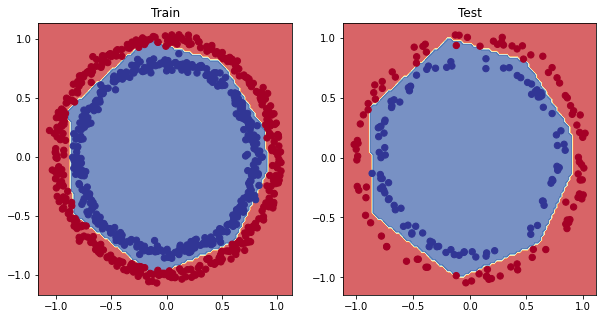

In [ ]:
#PLOT THE DECISION BOUNDARIES FOR TRAINING AND TESTING
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model10,X_test,y_test)
plt.show()

#### CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
#MAKE PREDCITIONS
y_preds=model10.predict(X_test)
#CREATE A CONFUSON MATRIX
confusion_matrix(y_test,y_preds)

ValueError: ignored

You will get an error while doing this

In [ ]:
y_test[:5]

array([1, 1, 1, 1, 0])

In [ ]:
y_preds[:5]

array([[0.9852654 ],
       [0.9992379 ],
       [0.9903235 ],
       [0.9970694 ],
       [0.39622977]], dtype=float32)

In [ ]:
#CONVERT PREDICTION PROBABILITIES TO BINARY FORMAT AND VIEW THE FIRST 5
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#CREATING CONFUSION MATRIX NOW
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

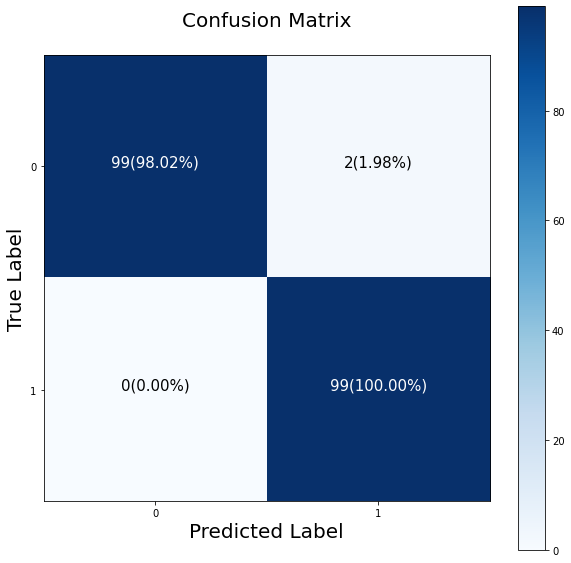

In [ ]:
import itertools

#CREATE CONFUSION MATRIX
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]
#LET'S PRETTIFY IT
fig,ax=plt.subplots(figsize=(10,10))
#CREATE A MATRIX PLOT
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
#CREATE CLASSES
classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#LABEL THE AXES
ax.set(title='Confusion Matrix',xlabel='Predicted Label',ylabel='True Label',
       xticks=np.arange(n_classes),yticks=np.arange(n_classes),
       xticklabels=labels, yticklabels=labels)
#SET X-AXIS LABELS TO BOTTOM
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
#ADJUST LABEL SIZE
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
#SET THRESHOLD FOR DIFFERENT COLOURS
threshold=(cm.max()+cm.min())/2
#PLOT THE TEXT ON EACH CELL
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.2f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j]>threshold else 'black',
           size=15)

##WORKING WITH LARGER EXAMPLE(MULTICLASS CLASSIFICATION)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#SHOW FIRST TRAINING EXAMPLE
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#SHOW TESTING EXAMPLE
print(f'Testing sample:\n{test_data[0]}\n')
print(f'Testing label:\n{test_labels[0]}\n')

Testing sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
#CHECKING THE SHAPE OF OUR DATA
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

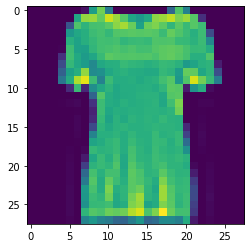

In [ ]:
#PLOT A SINGLE EXAMPLE
plt.imshow(train_data[10])

In [ ]:
#CHECKING LABELS SAMPLES
train_labels[10]

0

In [ ]:
#EACH TRAIN AND TEST SAMPLE IS ASSIGNED TO ONE OF THE LABELS BELOW
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)
#where 0 in train_labels indicates T-SHIRT/TOP

10

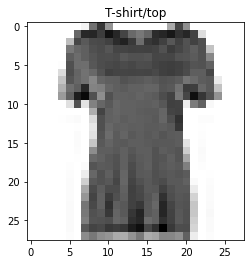

In [ ]:
#PLOT AN EXAMPLE IMAGE AND ITS LABEL
plt.imshow(train_data[10],cmap=plt.cm.binary)#change colors to black and white
plt.title(class_names[train_labels[10]])
plt.show()

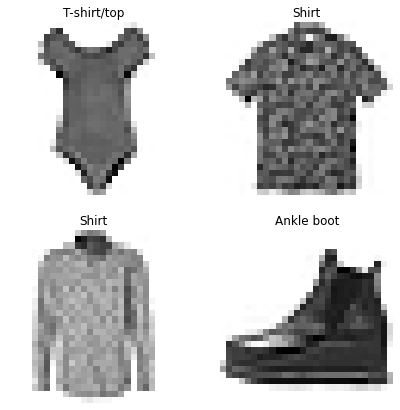

In [ ]:
#PLOT MULTIPLE RANDOM IMAGES OF FASHION MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

**MODEL 11**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model11=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])#gives 0 and 1-softmax
#COMPILE THE MODEL
model11.compile(loss='SparseCategoricalCrossentropy',
               optimizer='Adam',
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history11=model11.fit(train_data,train_labels,epochs=10,
                      validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

Accuracy here is 31%,we are going for another model

In [ ]:
model11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#CHECK MIN AND MAX OF TRAINING and TESTING DATASET
print(train_data.min(),train_data.max())
print(test_data.min(),test_data.max())

0 255
0 255


In [ ]:
#DIVIDING THE TRAIN AND TEST IMAGES BY MAX VALUES(NORMALIZATION)
train_data=train_data/255.0
test_data=test_data/255.0
#CHECK MIN AND MAX OF TRAINING and TESTING DATASET
print(train_data.min(),train_data.max())
print(test_data.min(),test_data.max())

0.0 1.0
0.0 1.0


**MODEL 12**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model12=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])
model12.compile(loss='SparseCategoricalCrossentropy',
               optimizer='Adam',
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history12=model12.fit(train_data,train_labels,epochs=10,
                      validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Model 12-->ACCURACY is 81.2%

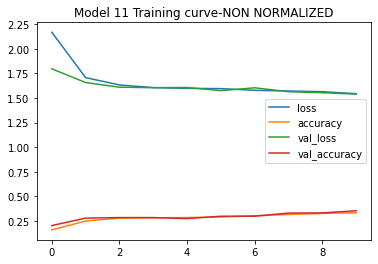

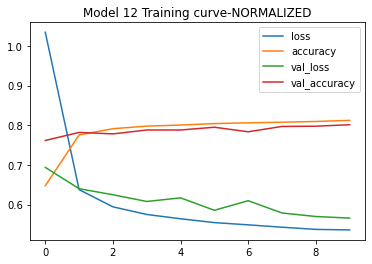

In [ ]:
#PLOT LOSS CURVE
pd.DataFrame(history11.history).plot()
plt.title('Model 11 Training curve-NON NORMALIZED') 
pd.DataFrame(history12.history).plot()
plt.title('Model 12 Training curve-NORMALIZED') 
plt.show()

**MODEL 13**

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model13=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])
model13.compile(loss='SparseCategoricalCrossentropy',
               optimizer='Adam',
               metrics=['accuracy'])
#CREATE A LEARNING RATE SCHEDULER CALLBACK
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
#FIT THE COMPILED MODEL
history13=model13.fit(train_data,train_labels,epochs=40,
                      validation_data=(test_data,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7366 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

MODEL 13-->Accuracy 81.5%

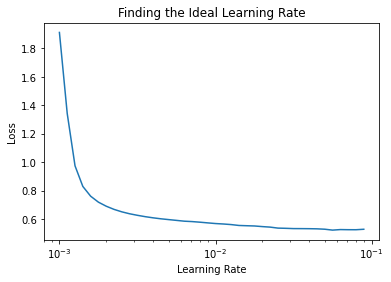

In [ ]:
#PLOT THE LEARNING RATE DECAY CURVE
lrs=1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs,history13.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')
plt.show()

**MODEL 14**-making some changes in model 13

In [ ]:
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model14=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])
model14.compile(loss='SparseCategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
#CREATE A LEARNING RATE SCHEDULER CALLBACK
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
#FIT THE COMPILED MODEL
history14=model14.fit(train_data,train_labels,epochs=20,
                      validation_data=(test_data,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step -

MODEL 14-->Accuracy 80.2%

In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

        #CREATE CONFUSION MATRIX
        cm=confusion_matrix(y_true,y_pred)
        cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        n_classes=cm.shape[0]
        #LET'S PRETTIFY IT
        fig,ax=plt.subplots(figsize=figsize)
        #CREATE A MATRIX PLOT
        cax=ax.matshow(cm,cmap=plt.cm.Blues)
        fig.colorbar(cax)
        #CREATE CLASSES
        classes=False
        if classes:
          labels=classes
        else:
          labels=np.arange(cm.shape[0])

        #LABEL THE AXES
        ax.set(title='Confusion Matrix',xlabel='Predicted Label',ylabel='True Label',
              xticks=np.arange(n_classes),yticks=np.arange(n_classes),
              xticklabels=labels, yticklabels=labels)
        #SET X-AXIS LABELS TO BOTTOM
        ax.xaxis.set_label_position('bottom')
        ax.xaxis.tick_bottom()
        #ADJUST LABEL SIZE
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.title.set_size(20)
        #SET THRESHOLD FOR DIFFERENT COLOURS
        threshold=(cm.max()+cm.min())/2
        #PLOT THE TEXT ON EACH CELL
        for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
          plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.2f}%)",
                  horizontalalignment='center',
                  color='white' if cm[i,j]>threshold else 'black',
                  size=text_size)


In [ ]:
#MAKING PREDICTIONS WITH MODEL 14
y_probs=model14.predict(test_data)
#view first 5 predictions
y_probs[:5]

array([[1.2742422e-09, 5.3467939e-08, 8.3849936e-06, 7.0589194e-06,
        9.7621414e-06, 5.4065306e-02, 7.2848763e-08, 6.3599236e-02,
        1.8366773e-03, 8.8047338e-01],
       [1.2383326e-05, 2.3110788e-17, 9.0172756e-01, 3.3549309e-06,
        5.8316510e-02, 1.4708356e-14, 3.9687403e-02, 3.2329574e-30,
        2.5285641e-04, 3.8686530e-21],
       [1.4126861e-04, 9.8552668e-01, 7.5693160e-06, 1.4010524e-02,
        2.0143854e-04, 9.7611138e-12, 1.0748472e-04, 4.0757726e-08,
        4.5021643e-06, 5.8545976e-07],
       [3.9738816e-06, 9.9383062e-01, 2.1684928e-06, 5.7096859e-03,
        2.5507511e-04, 4.3098709e-11, 1.8117787e-05, 1.1347497e-06,
        2.2362808e-06, 1.7706068e-04],
       [2.8454942e-01, 7.6419547e-06, 1.0144152e-01, 1.9927604e-02,
        3.2220736e-02, 1.3905409e-12, 5.6163126e-01, 1.6594300e-18,
        2.2172352e-04, 2.4364064e-15]], dtype=float32)

In [ ]:
#SEE THE PREDICTED CLASS NUMBER AND LABEL FOR THE FIRST EXAMPLE
y_probs[0].argmax(),class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
#CONVERTING ALL OF THE PREDICTIONS FROM PROBAILITIES TO LABELS
y_preds=y_probs.argmax(axis=1)
#VIEW FIRST 10
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
#CHECK A NON-PRETTIFIED CONFUSION MATRIX
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[868,   5,  17,  60,   1,   0,  36,   0,  12,   1],
       [  3, 951,   4,  29,   5,   5,   3,   0,   0,   0],
       [ 50,   3, 667,  11, 158,   2,  97,   0,  12,   0],
       [ 86,  18,  11, 824,  20,   1,  27,   2,  11,   0],
       [  6,   1, 116,  48, 728,   3,  93,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  78,   9,  49],
       [263,   5, 155,  45, 123,   5, 390,   0,  14,   0],
       [  0,   0,   0,   0,   0,  21,   0, 924,   1,  54],
       [ 15,   1,  35,  16,   3,   4,   5,   5, 916,   0],
       [  0,   3,   0,   0,   1,   8,   0,  39,   3, 946]])

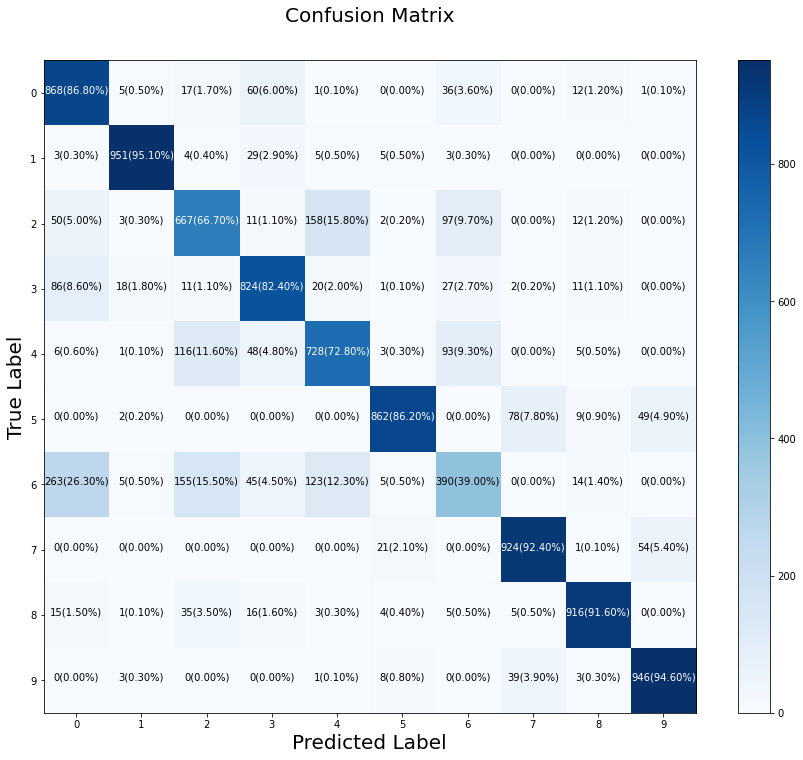

In [ ]:
#USING FUNCTION OF CONFUSION MATRIX
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,
                      classes=class_names,figsize=(15,12),text_size=10)

In [ ]:
def plot_random_image(model,images,true_labels,classes):
  #setup random integer
  i=random.randint(0,len(images))
  #create predictions and targets
  target_images=images[i]
  pred_probs=model.predict(target_images.reshape(1,28,28))
  pred_labels=classes[pred_probs.argmax()]
  true_labels=classes[true_labels[i]]
  #Plot the target image
  plt.imshow(target_images,cmap=plt.cm.binary)
  #Change the colour of titles depending on if the prediction is right or wrong
  if pred_labels==true_labels:
    color='green'
  else:
    color='red'
  #Add the xlabel for information predictions
  plt.xlabel('Predicitons:{}{:2.0f}%(True:{})'.format(pred_labels,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_labels),color=color)

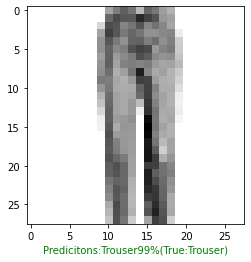

In [ ]:
#CHECK OUT A RANDOM IMAGE AS WELL AS ITS PREDICTIONS
plot_random_image(model=model14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
#FIND LAYERS OF OUR MODEL 14
model14.layers

In [ ]:
#weights and bias of a layer in a network
weights,biases=model14.layers[1].get_weights()
#Shape=1 weight matrix the size of our input data(28X28) per neuron (4)
weights,weights.shape

(array([[ 3.0885503 , -2.430857  ,  0.45438388, -3.0628507 ],
        [ 0.98286426, -2.71804   , -0.38760266, -1.1560956 ],
        [ 2.6185486 , -1.6931161 , -2.659585  , -2.343221  ],
        ...,
        [-0.5499583 ,  2.1220326 , -0.22042169,  0.75220233],
        [-0.5888785 ,  3.346401  ,  1.4520893 , -1.5131956 ],
        [ 0.90688974, -0.6245389 ,  0.64969605,  0.05348392]],
       dtype=float32), (784, 4))

In [ ]:
model14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


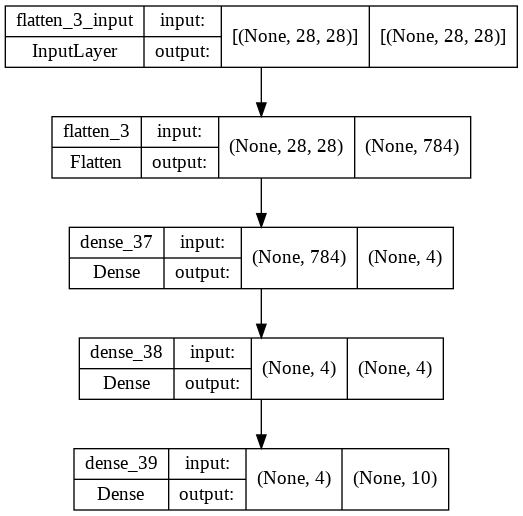

In [ ]:
from tensorflow.keras.utils import plot_model#see input and output of each layers
plot_model(model14,show_shapes=True)